# IEOR 242 Assignment 04
Matching of Compustat company list with SEC report files

In [1]:
import re
import pandas as pd

from extract_comp_name import extract_conm

import matplotlib.pyplot as plt
%matplotlib inline

# Install the following packages: python-Levenshtein & fuzzywuzzy
from fuzzywuzzy import fuzz

In [21]:
# Test the fuzzy string matching package
print(fuzz.ratio('GERIATRIC & MEDICAL COS INC', 'GERIATRIC & MEDICAL COMPANIES INC'))
print(fuzz.ratio('KYTHERA BIOPHARMA INC', 'KYTHERA BIOPHARMACEUTICALS INC'))

90
82


In [3]:
# Path to the file that contains the list of SEC company files within the ZIP file
SEC_FILE = 'data/sec.list.txt'

# The minimum match score of the fuzzy search
MIN_MATCH_SCORE = 95

# Words to remove from company names because they are too common
remove_words = ['laboratories', 'pharmaceuticals', 'corp', 'inc', 'intl', 'de', 'international', 'sys', 'co',
                'technologies', 'holdings', 'holding', 'management', 'ltd', 'health', 'biopharmaceuticals',
                'pharma', 'sciences', 'healthcare', 'medical', 'companies', 'cos']

## Pre-process CS list

In [4]:
# List with companie names from the Compustat file
cs_list = extract_conm('35')
print(cs_list[0:10])

['AFP IMAGING CORP', 'ALPHARMA INC  -CL A', 'ABBOTT LABORATORIES', 'ACETO CORP', 'ADAC LABORATORIES', 'AEQUITRON MEDICAL INC', 'AETNA INC', 'ATRION CORP', 'ALCIDE CORP', 'TAMIR BIOTHECHNOLOGY INC']


In [5]:
# Clean the company names
cs_list_cleaned = list(map(lambda m: ' '.join([i for i in re.sub(r'[^\w ]+', '', m).lower().split() if i not in remove_words]),
                           cs_list))
print(cs_list_cleaned[0:10])

['afp imaging', 'alpharma cl a', 'abbott', 'aceto', 'adac', 'aequitron', 'aetna', 'atrion', 'alcide', 'tamir biothechnology']


## Pre-process SEC list

In [6]:
# Regex for parsing the SEC company file
sec_regex = re.compile(r'./\d{4}_Q\d{1}_\d+_(.+)_10-K_\d{4}-\d{2}-\d{2}')

In [7]:
# Open the SEC company file and read it as a list
with open(SEC_FILE, 'r') as f:
    content = f.readlines()
print(content[0:10])

['./1993_Q4_29082_DISNEY WALT CO_10-K_1993-12-22\n', './1993_Q4_32377_ELIZABETHTOWN GAS CO_10-K_1993-12-13\n', './1993_Q4_353944_INTERNATIONAL GAME TECHNOLOGY_10-K_1993-12-23\n', './1993_Q4_861439_AMERICAN MEDICAL HOLDINGS INC_10-K_1993-11-29\n', './1994_Q1_100240_TURNER BROADCASTING SYSTEM INC_10-K_1994-03-31\n', './1994_Q1_100783_UNION CAMP CORP_10-K_1994-03-28\n', './1994_Q1_100826_UNION ELECTRIC CO_10-K_1994-03-29\n', './1994_Q1_100858_UNION LIGHT HEAT & POWER CO_10-K_1994-03-16\n', './1994_Q1_100880_UNION OIL CO OF CALIFORNIA_10-K_1994-03-31\n', './1994_Q1_100885_UNION PACIFIC CORP_10-K_1994-03-29\n']


In [8]:
# Apply the Regex matcher to all SEC companies to extract the actual company name
content_matched = list(map(lambda l: sec_regex.search(l), content))
print(content_matched[0:10])

[<_sre.SRE_Match object; span=(0, 46), match='./1993_Q4_29082_DISNEY WALT CO_10-K_1993-12-22'>, <_sre.SRE_Match object; span=(0, 52), match='./1993_Q4_32377_ELIZABETHTOWN GAS CO_10-K_1993-12>, <_sre.SRE_Match object; span=(0, 62), match='./1993_Q4_353944_INTERNATIONAL GAME TECHNOLOGY_10>, <_sre.SRE_Match object; span=(0, 62), match='./1993_Q4_861439_AMERICAN MEDICAL HOLDINGS INC_10>, <_sre.SRE_Match object; span=(0, 63), match='./1994_Q1_100240_TURNER BROADCASTING SYSTEM INC_1>, <_sre.SRE_Match object; span=(0, 48), match='./1994_Q1_100783_UNION CAMP CORP_10-K_1994-03-28'>, <_sre.SRE_Match object; span=(0, 50), match='./1994_Q1_100826_UNION ELECTRIC CO_10-K_1994-03-2>, <_sre.SRE_Match object; span=(0, 60), match='./1994_Q1_100858_UNION LIGHT HEAT & POWER CO_10-K>, <_sre.SRE_Match object; span=(0, 59), match='./1994_Q1_100880_UNION OIL CO OF CALIFORNIA_10-K_>, <_sre.SRE_Match object; span=(0, 51), match='./1994_Q1_100885_UNION PACIFIC CORP_10-K_1994-03->]


In [9]:
# Transform the list with SEC company files to list of tupes with the extracted company name and the file
sec_list = list(map(lambda m: (m.group(1).strip(), m.group(0)), content_matched))
print(sec_list[0:10])

[('DISNEY WALT CO', './1993_Q4_29082_DISNEY WALT CO_10-K_1993-12-22'), ('ELIZABETHTOWN GAS CO', './1993_Q4_32377_ELIZABETHTOWN GAS CO_10-K_1993-12-13'), ('INTERNATIONAL GAME TECHNOLOGY', './1993_Q4_353944_INTERNATIONAL GAME TECHNOLOGY_10-K_1993-12-23'), ('AMERICAN MEDICAL HOLDINGS INC', './1993_Q4_861439_AMERICAN MEDICAL HOLDINGS INC_10-K_1993-11-29'), ('TURNER BROADCASTING SYSTEM INC', './1994_Q1_100240_TURNER BROADCASTING SYSTEM INC_10-K_1994-03-31'), ('UNION CAMP CORP', './1994_Q1_100783_UNION CAMP CORP_10-K_1994-03-28'), ('UNION ELECTRIC CO', './1994_Q1_100826_UNION ELECTRIC CO_10-K_1994-03-29'), ('UNION LIGHT HEAT & POWER CO', './1994_Q1_100858_UNION LIGHT HEAT & POWER CO_10-K_1994-03-16'), ('UNION OIL CO OF CALIFORNIA', './1994_Q1_100880_UNION OIL CO OF CALIFORNIA_10-K_1994-03-31'), ('UNION PACIFIC CORP', './1994_Q1_100885_UNION PACIFIC CORP_10-K_1994-03-29')]


In [10]:
# Clean the company names
sec_list_cleaned = list(map(lambda m: (' '.join([i for i in re.sub(r'[^\w ]+', '', m[0]).lower().split() if i not in remove_words]), m[1]),
                                       sec_list))
print(sec_list_cleaned[0:10])

[('disney walt', './1993_Q4_29082_DISNEY WALT CO_10-K_1993-12-22'), ('elizabethtown gas', './1993_Q4_32377_ELIZABETHTOWN GAS CO_10-K_1993-12-13'), ('game technology', './1993_Q4_353944_INTERNATIONAL GAME TECHNOLOGY_10-K_1993-12-23'), ('american', './1993_Q4_861439_AMERICAN MEDICAL HOLDINGS INC_10-K_1993-11-29'), ('turner broadcasting system', './1994_Q1_100240_TURNER BROADCASTING SYSTEM INC_10-K_1994-03-31'), ('union camp', './1994_Q1_100783_UNION CAMP CORP_10-K_1994-03-28'), ('union electric', './1994_Q1_100826_UNION ELECTRIC CO_10-K_1994-03-29'), ('union light heat power', './1994_Q1_100858_UNION LIGHT HEAT & POWER CO_10-K_1994-03-16'), ('union oil of california', './1994_Q1_100880_UNION OIL CO OF CALIFORNIA_10-K_1994-03-31'), ('union pacific', './1994_Q1_100885_UNION PACIFIC CORP_10-K_1994-03-29')]


## Match the companies

In [11]:
# Create an empty pandas dataframe for the matching results
df = pd.DataFrame(columns=['cs', 'sec', 'sec_file', 'match_score'])

In [12]:
# Iterate through all Compustat files
for cs_company in cs_list_cleaned:
    # Iterate through all SEC companies
    for sec_company in sec_list_cleaned:
        # Check whether the SEC and the Compustat company names match
        match_score = fuzz.ratio(sec_company[0], cs_company)
        if match_score >= MIN_MATCH_SCORE:
            # If so, continue to the next SEC company
            df.loc[len(df)] = [cs_company, sec_company[0], sec_company[1], match_score]
            break

In [13]:
df.head(25)

,cs,sec,sec_file,match_score
0,afp imaging,afp imaging,./1998_Q3_319126_AFP IMAGING CORP_10-K_1998-09-28,100
1,abbott,abbott,./1994_Q1_1800_ABBOTT LABORATORIES_10-K_1994-0...,100
2,aceto,aceto,./1995_Q3_2034_ACETO CORP_10-K_1995-09-27,100
3,adac,adac,./1996_Q4_313798_ADAC LABORATORIES_10-K_1996-1...,100
4,aequitron,aequitron,./1995_Q3_736970_AEQUITRON MEDICAL INC_10-K_19...,100
5,aetna,aetna,./1997_Q1_1013761_AETNA INC_10-K_1997-02-28,100
6,atrion,atrion,./2000_Q1_701288_ATRION CORP_10-K_2000-03-29,100
7,alcide,alcide,./1995_Q3_708484_ALCIDE CORP_10-K_1995-08-23,100
8,tamir biothechnology,tamir biotechnology,"./2010_Q4_708717_Tamir Biotechnology, Inc._10-...",97
9,alza,alza,./1994_Q1_4310_ALZA CORP_10-K_1994-03-31,100


In [14]:
# Match score statistics
df['match_score'].describe()

count    1665.000000
mean       99.902102
std         0.630287
min        95.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: match_score, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0de605668>]], dtype=object)

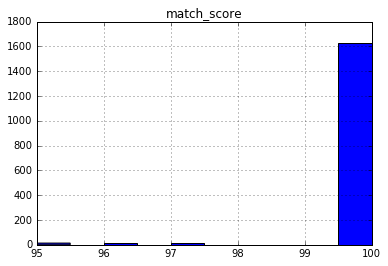

In [15]:
# Match score histogram
df.hist(column=['match_score'])

In [16]:
# Show the worst matchings
df[df['match_score'] == df['match_score'].min()]

,cs,sec,sec_file,match_score
261,horizoncms,horizon cms,./1996_Q3_806151_HORIZON CMS HEALTHCARE CORP_1...,95
616,cybercare,cyber care,./2002_Q2_887904_CYBER CARE INC_10-K_2002-04-15,95
658,ruralmetro,rural metro,./1997_Q3_906326_RURAL METRO CORP -DE-_10-K_19...,95
710,bioplexus,bio plexus,./1997_Q2_865532_BIO PLEXUS INC_10-K_1997-04-15,95
728,imaging diagnostic systems,imaging diagnostic systems fl,./2004_Q3_790652_IMAGING DIAGNOSTIC SYSTEMS IN...,95
751,plan vista,planvista,./2002_Q2_942319_PLANVISTA CORP_10-K_2002-04-16,95
759,spinetech,spine tech,./1997_Q1_889842_SPINE TECH INC_10-K_1997-03-31,95
765,biomedical technology soltns,biomedical technology solutions,./2009_Q2_1443062_BIOMEDICAL TECHNOLOGY SOLUTI...,95
961,revolutions,evolutions,./1997_Q3_1009326_EVOLUTIONS INC_10-K_1997-09-22,95
1027,allergan spclty therapeutics,allergan specialty therapeutics,./2001_Q1_1049711_ALLERGAN SPECIALTY THERAPEUT...,95


In [19]:
# List unmatched companies
print("Number of CS companies:", len(cs_list_cleaned))
print("Number of SEC companies:", len(sec_list_cleaned))
unmatched = set(cs_list_cleaned) - set(df['cs'].tolist())
print("Percentage matched:", (len(cs_list_cleaned) - len(unmatched)) / len(cs_list_cleaned))

Number of CS companies: 3039
Number of SEC companies: 153734
Percentage matched: 0.5491938137545245


In [20]:
print(unmatched)

{'', 'primus therapeutics redh', 'virobay redh', 'hyal pharmaceutical cp', 'alsius redh', 'marquette', 'transitional hospitals cp', 'anthem insurance', 'meldex plc', 'clinicor', 'lumena redh', 'ndl products', 'symbion', 'ondine biomedical', 'imar', 'alliance svcs', 'allon therapeutics', 'trillium therapeutics', 'aurora diagnostics redh', 'led diagnostics', 'regenxbio', 'medisys group incm fd', 'icon plc', 'national dentex', 'berman center', 'abviva', 'cerner', 'neurobiological techn', 'ore', 'gull', 'amerihealth incde', 'novartis ag', 'home nutritional svcs', 'complete wellness ctrs', 'chemical dependency hlthcare', 'amarin', 'allou', 'acclarent redh', 'cyclopss', 'medquest associates', 'meris', 'mindray', 'viratek', 'biotie therapies', 'medphone', 'pharmaceutical prod dev', 'bostwick laboratoriesredh', 'arterial vascular engr', 'singulex incredh', 'cl a', 'picis redh', 'sinofresh', 'arius research', 'integ', 'world alternatives', 'juno therapeutics', 'ophectra real estate inv', 'q the